In [90]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [47]:
file_path = "./IMDB-Movie-Data.csv"
fd = pd.read_csv(file_path)
fd.info()
print(fd.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5 

In [78]:
data = fd["Genre"]
print(data.head())
#统计分类列表
temp_list= fd["Genre"].str.split(",").tolist() #[[], [], []]

genre_list = set([i for j in temp_list for i in j])
print(len(genre_list))
print(genre_list)
#temp_list

0     Action,Adventure,Sci-Fi
1    Adventure,Mystery,Sci-Fi
2             Horror,Thriller
3     Animation,Comedy,Family
4    Action,Adventure,Fantasy
Name: Genre, dtype: object
20
{'Adventure', 'Animation', 'Family', 'Western', 'Comedy', 'Biography', 'Mystery', 'Thriller', 'War', 'Music', 'Sport', 'Drama', 'Horror', 'Crime', 'Musical', 'Sci-Fi', 'Action', 'Fantasy', 'Romance', 'History'}


In [79]:
# 构造全为0 的数组
df = pd.DataFrame(np.zeros((fd["Genre"].shape[0], len(genre_list))), 
                  columns=genre_list)

In [109]:
df.loc[[1],["Animation"]]
df.index

RangeIndex(start=0, stop=1000, step=1)

In [82]:
#给每个电影出现分类的位置赋值1
for i in range(len(genre_list)):
    #df.loc[0, ["Sci-fi", "Musical"]]=1
    df.loc[[i],temp_list[i]] = 1

# 统计每个分类的电影的数量和
genre_count = df.sum(axis=0)


In [104]:
#排序
genre_count = genre_count.sort_values()
genre_count.index
genre_count.ndim


1

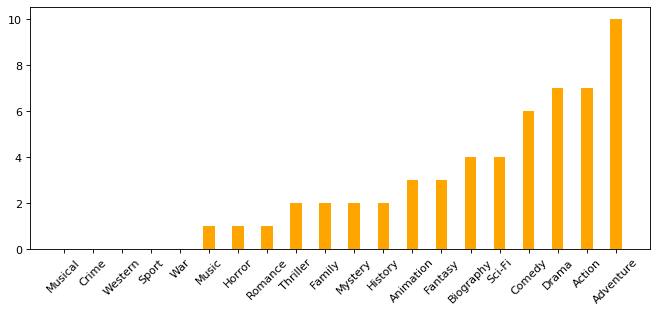

In [114]:
#plot

plt.figure(figsize=(10,4), dpi=80)
plt.bar(range(len(genre_count.index)), genre_count.values, 
        width=0.4, color="orange")

plt.xticks(range(len(genre_count.index)), genre_count.index,rotation=45)
plt.show()


In [111]:
help(plt.xticks)

Help on function xticks in module matplotlib.pyplot:

xticks(ticks=None, labels=None, **kwargs)
    Get or set the current tick locations and labels of the x-axis.
    
    Call signatures::
    
        locs, labels = xticks()            # Get locations and labels
        xticks(ticks, [labels], **kwargs)  # Set locations and labels
    
    Parameters
    ----------
    ticks : array_like
        A list of positions at which ticks should be placed. You can pass an
        empty list to disable xticks.
    
    labels : array_like, optional
        A list of explicit labels to place at the given *locs*.
    
    **kwargs
        :class:`.Text` properties can be used to control the appearance of
        the labels.
    
    Returns
    -------
    locs
        An array of label locations.
    labels
        A list of `.Text` objects.
    
    Notes
    -----
    Calling this function with no arguments (e.g. ``xticks()``) is the pyplot
    equivalent of calling `~.Axes.get_xticks` and `

['a', 'b', 'c', 'd']